In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\GIA DAT\ML Zoomcamp\2. Regression\car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Preparing the dataset

In [4]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [5]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

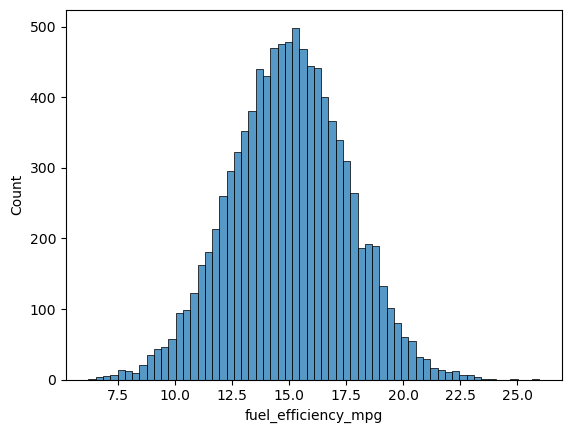

In [8]:
sns.histplot(df.fuel_efficiency_mpg)

It is already a normal distribution

In [10]:
# Question 1

In [11]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [12]:
# Question 2
df.horsepower.median()

149.0

## Prepare and split the dataset

In [14]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [15]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [16]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train: n_train + n_val]
df_test = df.iloc[n_train + n_val: ]

In [17]:
idx = np.arange(n)

In [18]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [19]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val: ]]

In [20]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [21]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [22]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [23]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [24]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

In [25]:
# Question 3

In [26]:
## Train model with fill 0 to NA values

In [27]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [28]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [29]:
# Train model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [30]:
target = "fuel_efficiency_mpg"
features = df.columns[df.columns != target].tolist()

In [31]:
X_train_0 = df_train[features].fillna(0).to_numpy()
w0_0, w_0 = train_linear_regression(X_train_0, y_train)

In [32]:
X_train_0, y_train

(array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
        [ 160.        ,  141.        , 2741.17048439, 2019.        ],
        [ 230.        ,  155.        , 2471.88023726, 2017.        ],
        ...,
        [ 210.        ,  152.        , 2500.17568746, 2020.        ],
        [ 250.        ,  154.        , 2254.31324473, 2002.        ],
        [ 210.        ,  152.        , 2435.20360628, 2004.        ]]),
 array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
        18.92574819, 17.96528447]))

In [33]:
X_val_0 = df_val[features].fillna(0).to_numpy()
y_pred_val_0 = w0_0 + X_val_0.dot(w_0)

In [34]:
round(rmse(y_val, y_pred_val_0),2)

0.52

<Axes: ylabel='Count'>

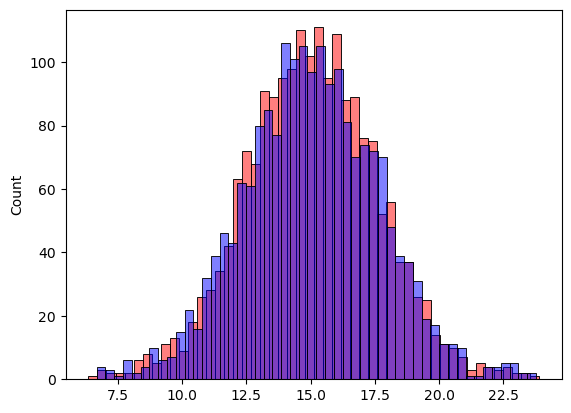

In [38]:
sns.histplot(y_pred_val_0, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

In [40]:
X_train_0 = df_train[features].fillna(0).to_numpy()
w0, w = train_linear_regression(X_train_0, y_train)
X_val_0 = df_val[features].fillna(0).to_numpy()
y_pred_val_0 = w0 + X_val_0.dot(w)
round(rmse(y_val, y_pred_val_0),2)

0.52

In [42]:
horsepower_mean = df_train["horsepower"].mean()
X_train_mean = df_train[features].fillna(horsepower_mean).to_numpy()
X_val_mean = df_val[features].fillna(horsepower_mean).to_numpy()
w0, w = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0 + X_val_mean.dot(w)

In [44]:
round(rmse(y_val, y_pred_mean), 2)

0.46

Mean gives the best RMSE

<Axes: ylabel='Count'>

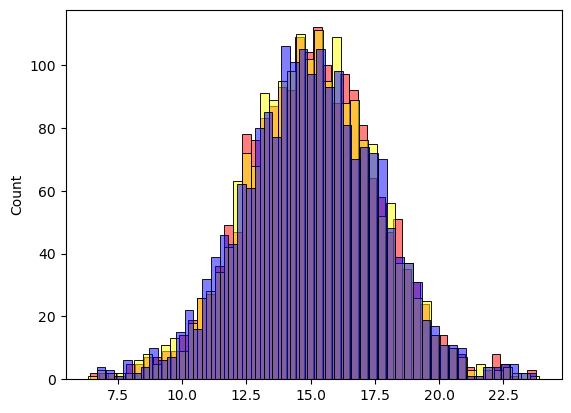

In [50]:
sns.histplot(y_pred_mean, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_pred_val_0, color = 'yellow', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

In [ ]:
# Question 4

In [52]:
## Train
X_train = df_train[features].fillna(0).to_numpy()
w0, w = train_linear_regression(X_train, y_train)

## Validation
X_val = df_val[features].fillna(0).to_numpy()
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5173782638835324

In [54]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [56]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    ## Train
    X_train = df_train[features].fillna(0).to_numpy()
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    ## Validation
    X_val = df_val[features].fillna(0).to_numpy()
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)

    print(f"r = {r:<4}", "|", score)

r = 0    | 0.5173782638835324
r = 0.01 | 0.5171115525771272
r = 0.1  | 0.5187525130701794
r = 1    | 0.5222348802092802
r = 5    | 0.5228916092823583
r = 10   | 0.5229812979636588
r = 100  | 0.523063623381993


So that the best RMSE is r = 0

In [ ]:
# Question  5

In [170]:
score = list()
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Shuffle
    np.random.seed(i)

    # Set idx again if not at the later seed it will shuffle based on the shuffled index
    # And our output will be wrong
    idx = np.arange(n) 
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val: ]]
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    ## Train
    X_train = df_train[features].fillna(0).to_numpy()
    w0, w = train_linear_regression(X_train, y_train)
    
    ## Validation
    X_val = df_val[features].fillna(0).to_numpy()
    y_pred = w0 + X_val.dot(w)
    
    score.append(rmse(y_val, y_pred))
round(np.std(score),5)

0.00699

In [160]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # Set the seed for this iteration's data split
    np.random.seed(seed)

    # Shuffle the dataset indices
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    # Create the data splits
    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train : n_train + n_val]].copy()
    df_test = df.iloc[idx[n_train + n_val :]].copy()

    # Prepare data (fill missing values with 0)
    X_train = df_train[features].fillna(0).to_numpy()
    y_train = df_train[target].to_numpy()

    X_val = df_val[features].fillna(0).to_numpy()
    y_val = df_val[target].to_numpy()

    # Train the model (without regularization)
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)

    # Calculate and store the score
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

    print(f"Seed: {seed} -> RMSE: {round(score, 3)}")

# Standard deviation of the scores
std_dev = round(np.std(rmse_scores), 5)
print(f"The standard deviation of the RMSE scores is: {std_dev}")

Seed: 0 -> RMSE: 0.521
Seed: 1 -> RMSE: 0.521
Seed: 2 -> RMSE: 0.523
Seed: 3 -> RMSE: 0.516
Seed: 4 -> RMSE: 0.511
Seed: 5 -> RMSE: 0.528
Seed: 6 -> RMSE: 0.531
Seed: 7 -> RMSE: 0.509
Seed: 8 -> RMSE: 0.515
Seed: 9 -> RMSE: 0.513
The standard deviation of the RMSE scores is: 0.00699


In [ ]:
# Question 6

In [168]:
# Set seed
np.random.seed(9)

# Split dataset
idx = np.arange(n)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val: ]]
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Combine train and valid dataset
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop = True)
X_full_train = df_full_train[features].fillna(0).to_numpy()
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)
X_test = df_test[features].fillna(0).to_numpy()
y_pred = w0 + X_test.dot(w)
score = round(rmse(y_test, y_pred),4)
score

0.5156

In [172]:
df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,240,NaN,3629.912976,2003,11.675791
1,230,183.0,2675.510371,2011,16.730326
2,270,176.0,3751.005987,2017,11.831028
3,130,174.0,2703.817442,2017,17.360789
4,240,NaN,2765.931806,2017,15.765597


In [180]:
car = df_test.iloc[4].to_dict()
df_small = pd.DataFrame([car])
X_small = df_small[features].fillna(0).to_numpy()
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

15.685640011570596

In [182]:
y_test[4]

15.765597031694355